<a href="https://colab.research.google.com/github/MathiasSchindlerCPH/BSE-T2-CML2-repo/blob/main/InClass_1_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In-Class Assignment 1: $k$-Nearest Neighbors**

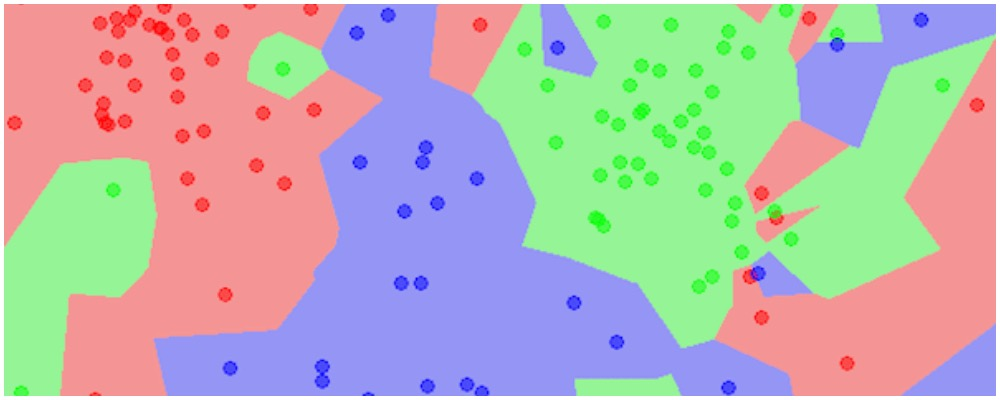

*Preparation for In-Class Assignment* 1 regarding $k$-Nearest Neighbors (henceforth, KNN) algorithms.

Course: Computation Machine Learning 2

Student: Mathias Schindler

## Preamble

In [2]:
# Mount G Drive
from google.colab import drive
drive.mount('/content/drive')

# Set path
import os
os.chdir('/content/drive/My Drive/--T2-CML2_materials-copy')

Mounted at /content/drive


In [30]:
# preamble 

%matplotlib inline
import matplotlib.pylab as plt

#import auxiliar functions
  #import os, sys,inspect
  #currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
  #parentdir = os.path.dirname(os.path.dirname(currentdir))
  #sys.path.insert(1, parentdir)
import pandas as pd
import seaborn as sns
import numpy as np
import ipywidgets
import random
import time

from math import floor, ceil
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

# Helper fcts
from utils.helper_functions import *

# Random seed for reproducibility
np.random.seed(3123) 

## `iris` Dataset

In [72]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.data[0:10])
print(iris.data[-10:])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [20]:
# Slice first two features. Obtain 2-d array
X = iris.data[:, :2]
print(X[0:10])
print(X.shape)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
(150, 2)


In [61]:
factor = 2
target = [[4.9, 3.1]]
#target = target*factor
#target = target[0][0]*factor
target

[[4.9, 3.1]]

In [65]:
# Instantiate KNN Classifier
n_neighbors = 10
weights = 'distance' # "closer neighbors of a query point will have "
                     # "greater influence than neighbors which are further away."
clf = NearestNeighbors(n_neighbors = n_neighbors, algorithm='brute')

# Fit to data
clf.fit(X)

# Distances and indicies
distances, indices = clf.kneighbors(target) #<- "Find the K-neighbors of a point.", i.e. 'target' in this instanc
print("Distances:")
print(distances)
print("\n Indices:")
print(indices)

Distances:
[[0.         0.         0.1        0.1        0.14142136 0.14142136
  0.14142136 0.14142136 0.2236068  0.2236068 ]]

 Indices:
[[34  9 30  1 25 45 35 12 49 29]]


From `sklearn`, `NearestNeighbors.kneighbors` has option `return_distance=True` as default. 
* `indices` stores the index of nearest neighbors (10 *NN* in this instance) from fitted dataframe (`X` in this instance). 
* `distances` stores the distance measures referring to the indices from `indices`.

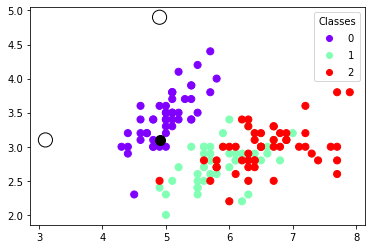

In [73]:
# Store 10 NN
TenNeighbors = X[indices]
TenNeighbors

# True classes
y = iris.target

# Convenience plot function (from 'utils')
Plot_Point(X, y, target, TenNeighbors)

## Higher-Dimensional Data

In [74]:
toydf = pd.read_csv('https://raw.githubusercontent.com/MathiasSchindlerCPH/datasets/master/Mall_Customers.csv')
toydf

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
